In [15]:
# import packages
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

"""
IMPORTANT:
For this program to work the researcher needs to put both csv files
cycle1.csv and cycle2.csv in a folder called Observations. Run
DownloadMongoDB.ipynb to get the files. You will have to manually
put these new files in the Observations folder which will be located
in the same folder as this file.
"""

"""
Headers for Cycle1 DF:
_id, Original_Object_ID, MDJ, Magnitude, Magnitude_Error

Cycle1 Size: 28878 Asteroids

Headers for Cycle2 DF:
_id, Object_ID, MDJ, Magnitude, Magnitude_Error, Sector

Cycle2 Size: 18712 Asteroids
"""

# import data from csv file into a pandas df
cycle1_df = pd.read_csv("Observations/cycle1.csv", low_memory=False)
cycle2_df = pd.read_csv("Observations/cycle2.csv", low_memory=False)

# define sine function to fit
def sine_function(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(frequency * x + phase) + offset

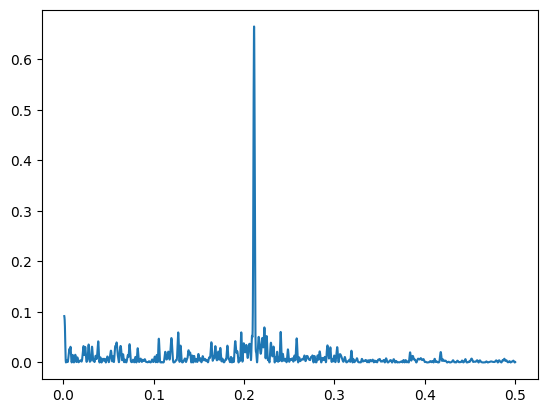

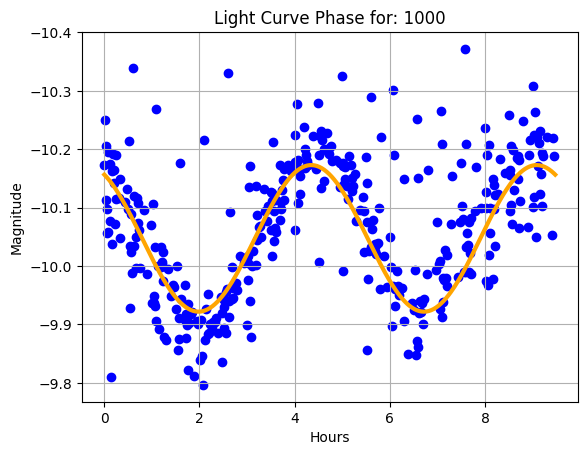

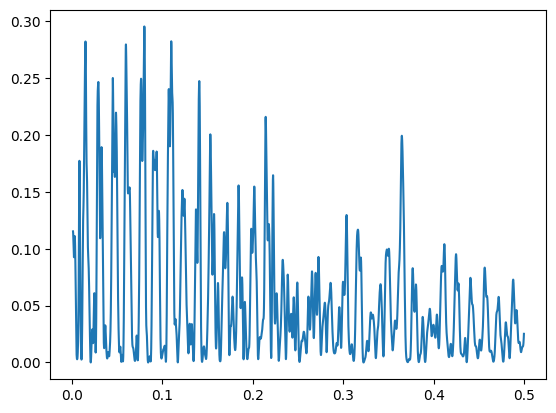

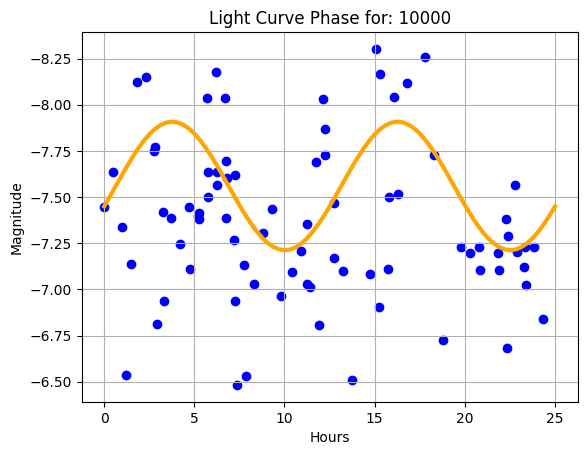

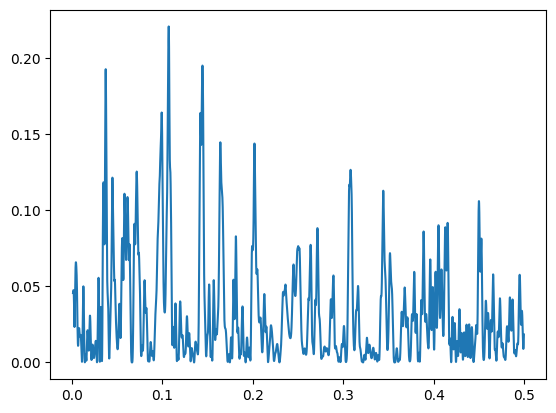

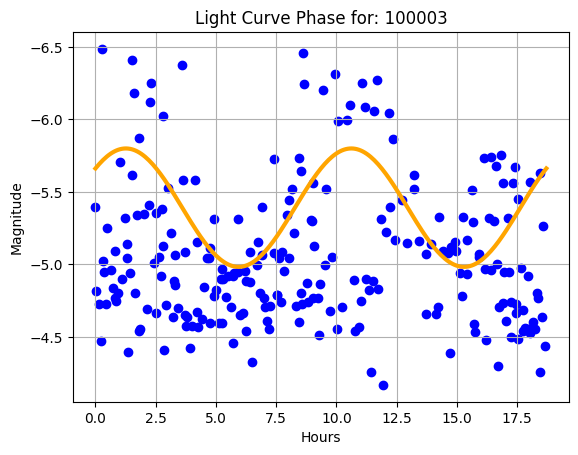

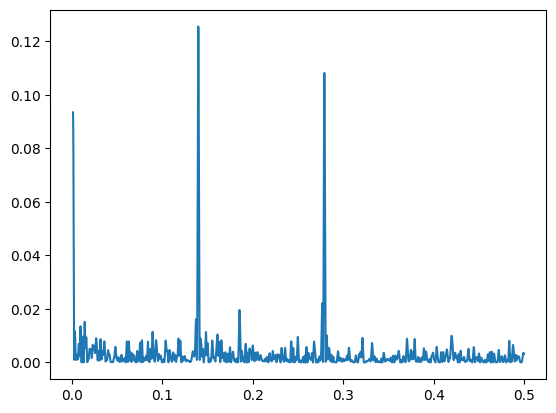

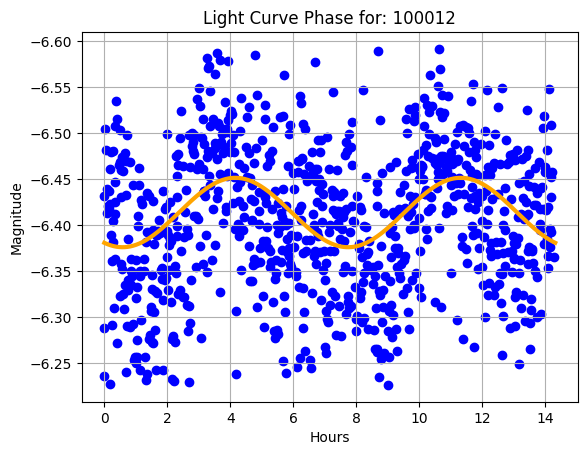

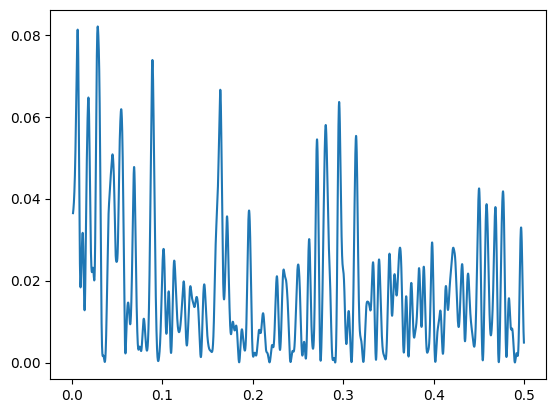

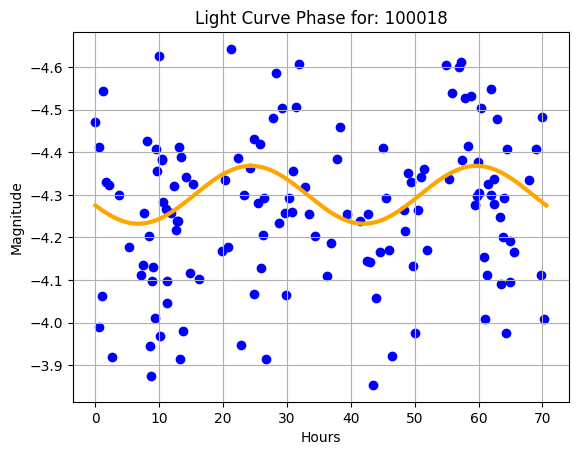

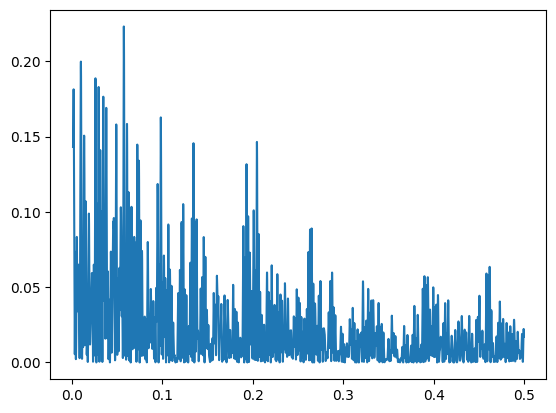

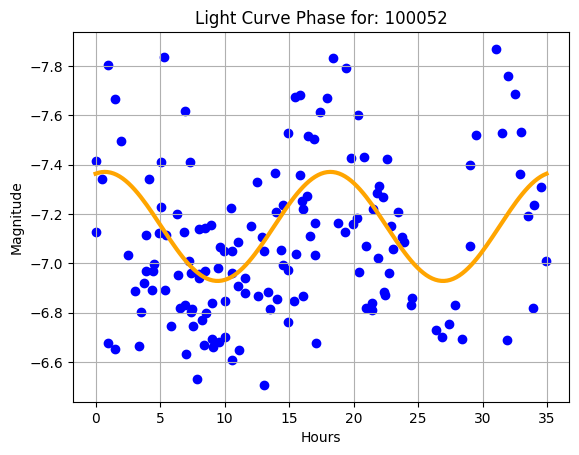

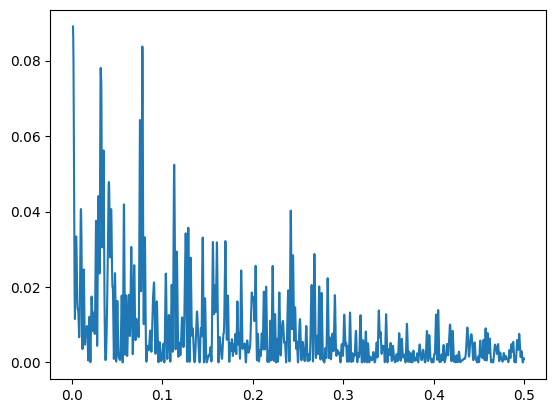

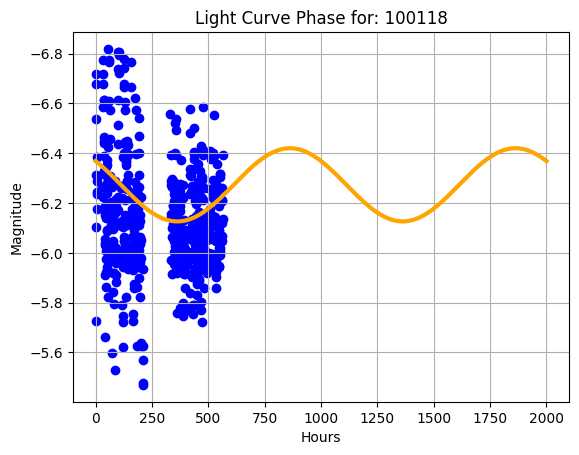

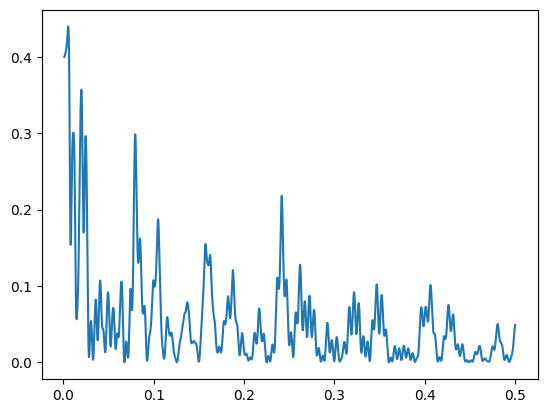

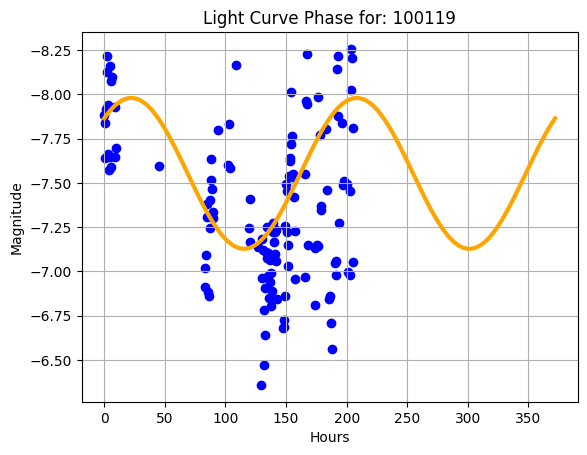

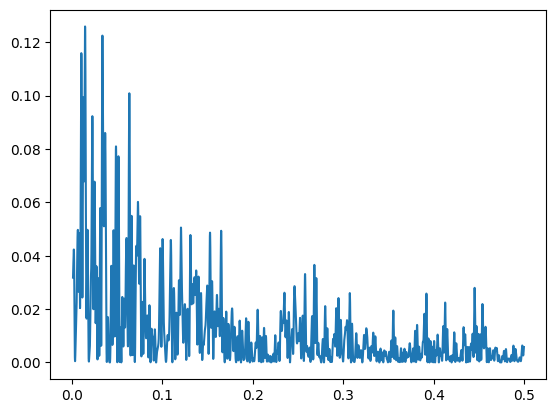

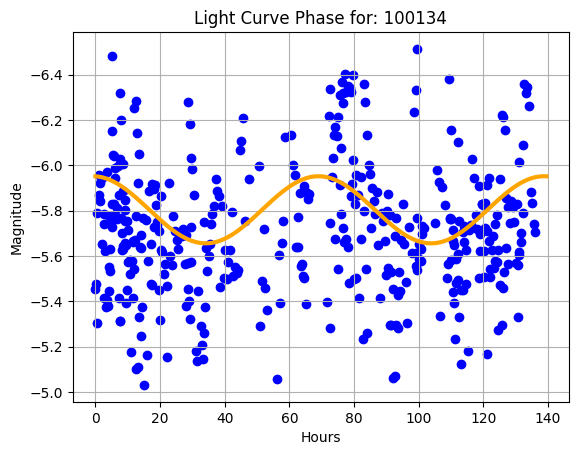

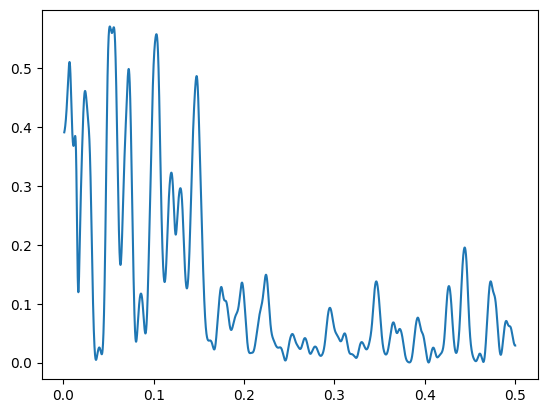

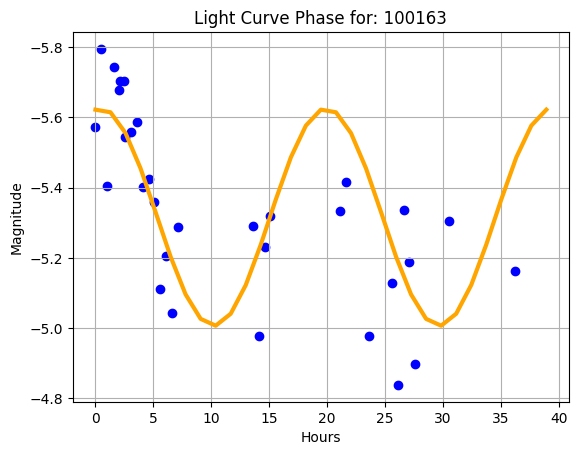

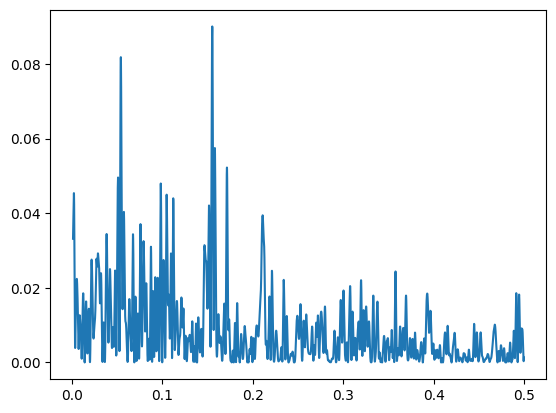

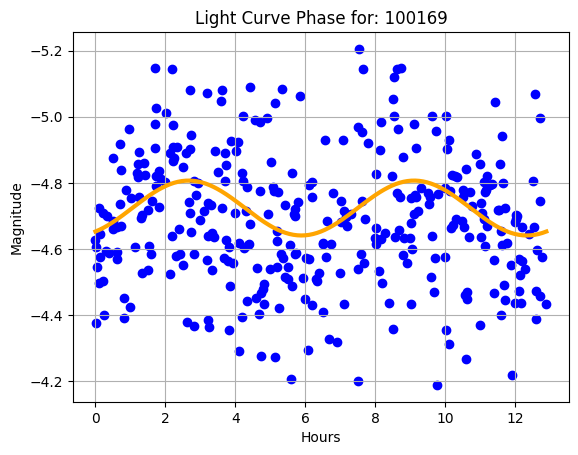

In [ ]:
# group each asteroid by their object id
asteroids = cycle1_df.groupby("Original_Object_ID")

count = 0

# plot each asteroid
for object_id, asteroid in asteroids:

    """
    Derive the rotational period of an object from MDJ
    and Magnitude.
    """

    # extract MJD, magnitude, magnitude error
    time_mdj = asteroid["MJD"].values
    magnitude = asteroid["Magnitude"].values
    error = asteroid["Magnitude_Error"].values

    # define frequency range (1 to 24 hours period = 1/24 to 1 cycles/hour)
    # convert MJD to hours relative to first timestamp
    time_hours = (time_mdj - time_mdj.min()) * 24
    frequency = np.linspace(1/1000, 1/2, 1000000)
    power = LombScargle(time_hours, magnitude, error).power(frequency)

    plt.plot(frequency, power)
    plt.show()

    # best period is 1 / frequency at peak power
    best_frequency = frequency[np.argmax(power)]
    best_period = 1 / best_frequency

    # double the period for full rotation
    best_period = best_period * 2

    # create a lomb scargle model generating a sine curve fit
    ls = LombScargle(time_hours, magnitude, error)
    magnitude_fit = ls.model(time_hours, best_frequency)
    time_fit = np.linspace(0, best_period, len(magnitude_fit))
    magnitude_fit = ls.model(time_fit, best_frequency)
    phase = (time_hours % best_period)

    """
    With the rotational period fit the model sine wave with
    the data.

    best_period is the period
    amplitude is calculated below
    """

    # find the max and mind of magnitude fit for the amplitude
    amplitude = max(magnitude_fit) - min(magnitude_fit)

    # plot the lomb scargle model need to add the magnitude fit
    plt.plot(time_fit, magnitude_fit, color = "orange", linewidth = 3)
    plt.scatter(phase, magnitude, color="blue")
    plt.title(f"Light Curve Phase for: {object_id}")
    plt.xlabel("Hours")
    plt.ylabel("Magnitude")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

    # determine how well the model fits the data

    # is this interesting or not?

    # save data into csv file

    """
    Plotting the raw time series data
    """

    # plot the timeseries data
    # plt.errorbar(asteroid["MJD"], asteroid["Magnitude"], yerr = asteroid["Magnitude_Error"], 
    #              fmt = "o", ecolor = "red", color = "orange", elinewidth = 1, capsize = 2)
    # plt.title(f"Magnitude vs MJD for Object ID {object_id}")
    # plt.xlabel("MJD")
    # plt.ylabel("Magnitude")
    # plt.gca().invert_yaxis()
    # plt.grid(True)
    # plt.show()

    count += 1

    # display the first 10
    if count > 10:
        break
